요인 = 데이터프레임의 컬럼

카테고리형 데이터 = 빈도를 체크하는 것(count) / 합계계산 X
hue : 그룹핑을 수행할 명목형 변수 (데이터를 그릴 기준이 된다. )

col은 그래프를 나누는 기준
hue는 그룹별 나누는 기준


## seaborn 빈도 그래프

### #01. 기본준비

#### 패키지 참조

In [ ]:
! pip install statsmodels

In [10]:
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel
import seaborn as sb
import numpy as np

#### 그래프 전역 설정

In [11]:
plt.rcParams["font.family"] = 'Malgun Gothic'  # windows 한글 지원 폰트 설정
# plt.rcParams["font.family"] = 'AppleGothic'  # mac 한글 지원 폰트 설정

plt.rcParams["font.size"] = 12               # 기본 글자크기 설정
plt.rcParams["figure.figsize"] = (8, 5)    # 그래프 사이즈 (가로,세로)inch
plt.rcParams["axes.unicode_minus"] = False

#### 데이터 준비하기

##### 타이타닉 탑승객 데이터
> 출처: https://www.kaggle.com/competitions/titanic

In [14]:
titanic = read_excel("https://data.hossam.kr/D01/titanic.xlsx", index_col="PassengerId")
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### #02. 데이터 전처리

#### 범주형 데이터 처리
##### 각 요인별 데이터 타입 확인

In [15]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

##### 범주형 데이터 처리

In [16]:
df = titanic.astype({"Survived": "category", "Pclass": "category", "Sex": "category", 
                     "Cabin": "category", "Embarked": "category"})
df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin       category
Embarked    category
dtype: object

### #03. 빈도 막대 그래프
###### 병렬 막대 그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프
###### `catplot()` 메서드를 사용
###### `catplot()`은 기본적으로 범주형 변수에 대한 그래프를 그리는 데 사용되지만, 다양한 플롯 유형을 지원한다.

#### 1. 기본 사용방법
###### `x`축 집단을 구분할 수 있는 범주형 변수를 설정하고 `kind='count'`파라미터를 설정한다. 
###### 그래프의 크기가 `rcParams`속성의 영향을 받지 않는다.
###### 크기 설정을 위해서는 `catplot()`메서드로부터 객체를 리턴받아 사이즈 설정을 개별적으로 수행해야 한다.

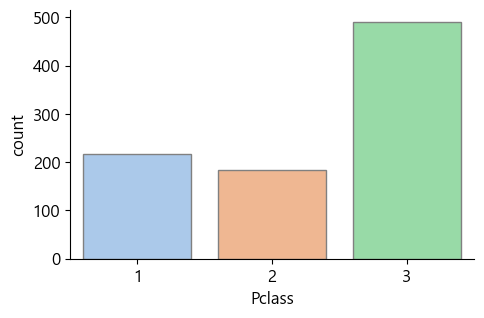

In [27]:
g = sb.catplot(
              data=df,              
               x='Pclass',          #집단을 구분하는 기준
               kind='count',        #그래프 종류
               palette='pastel',    #색상표 지정
               edgecolor='0.5'      #막대 테두리 색상 투명도 지정(0=불투명~1:투명)
               )

g.fig.set_figwidth(5)
g.fig.set_figheight(3)

plt.show()

#### 2. 범례 기준 추가
###### 각 막대를 구분할 수 있는 범주형 변수를 `hue`파라미터로 추가
###### `kind`:그래프의 종류는 범주형 축 수준 플로팅 함수의 이름(그래프 형태에 관여)
- "strip","swarm","box","violin","boxen","point","bar" 또는 "count"


##### 객실 등급별 탑승 지역빈도

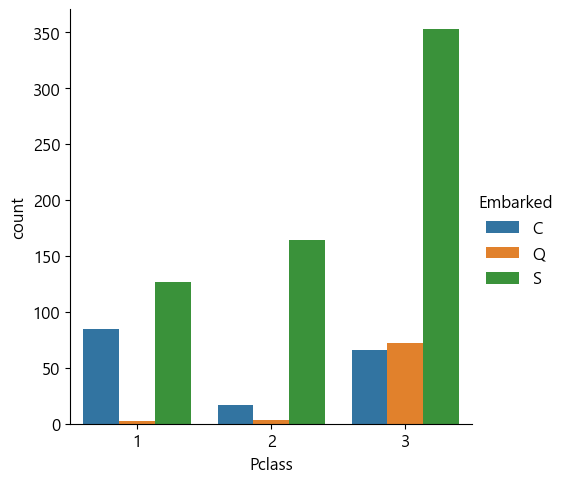

In [21]:
# 객실 등급별(x축=Pclass) 탑승 지역(hue=Embarked) 빈도(kind=count ->catplot)
sb.catplot(data=df,
           x="Pclass",
           kind = "count",
           hue="Embarked")
plt.show()

##### 객실 등급별 성별빈도

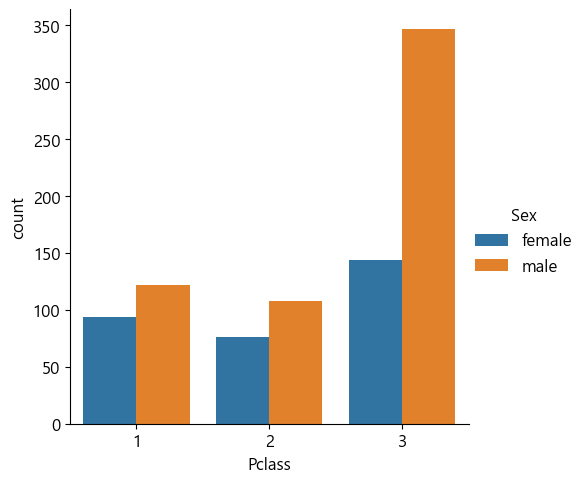

In [22]:
# 객실 등급별(x축 = Pclass) 성별(hue=sex) 빈도(kind=count -> sb.catplot)
sb.catplot(data=df,
           kind='count',
           x='Pclass',
           hue='Sex')
plt.show()

#### 객실 등급별 생존여부 빈도

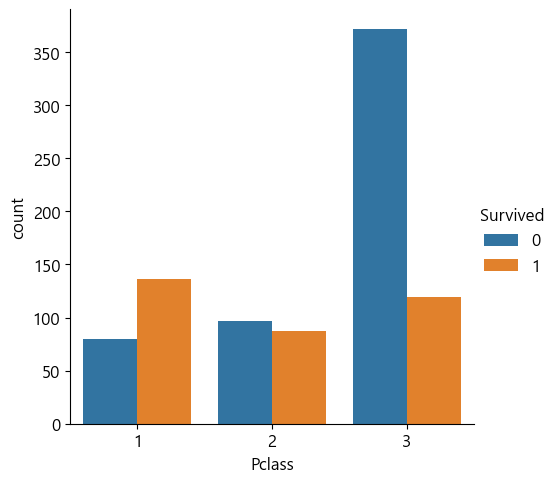

In [23]:
# 객실 등급별(x축=Pclass) 생존여부(hue=Survived) 빈도(kind=count)
sb.catplot(data=df,
           x='Pclass',
           kind='count',
           hue='Survived')
plt.show()

#### 3. 병렬 빈도 막대 그래프
- 이미 범주가 주어진 상황에서 추가적인 범주를 표현하고자 할 때 그래프를 두 개로 분리
- 병렬 막대그래프는 두 변량에 대한 빈도 막대 그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프
- seaborn으로 병렬 빈도 막대그래프를 그리려면 sns.catplot함수에 kind='count'와 col옵션을 추가한다.

##### 객실 등급에 따른 생존 여부를 두 개의 그래프로 분리

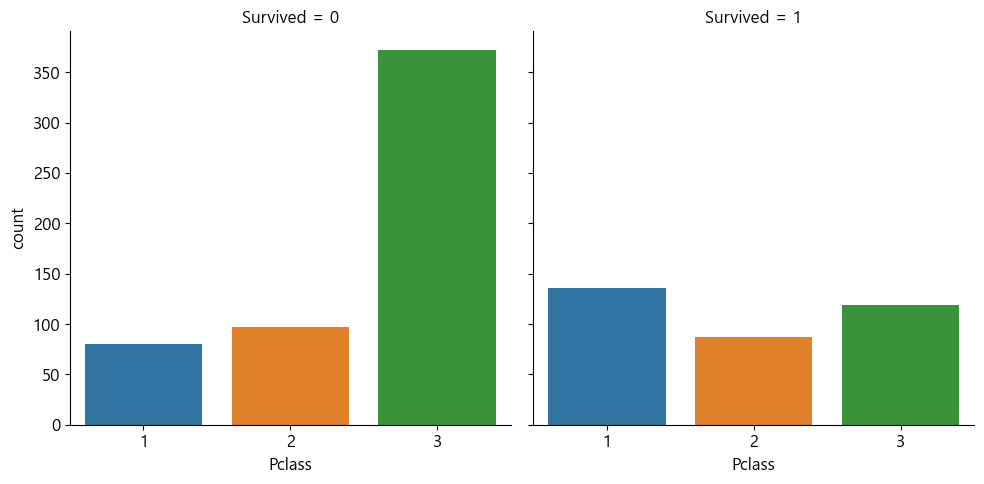

In [24]:
sb.catplot(data=titanic,
           x='Pclass',
           col='Survived',
           kind='count')
plt.show()

#### 4. 가로 빈도 막대 그래프
###### `x`파라미터 대신 `y`파라미터를 사용한다.

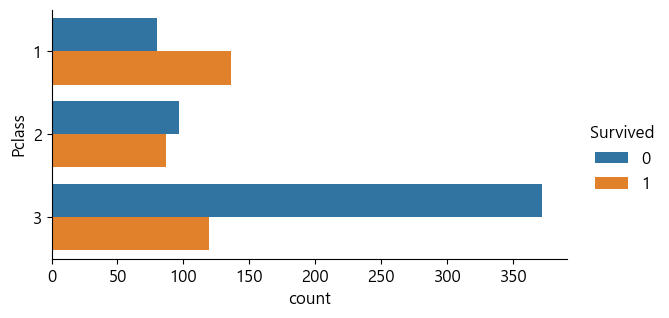

In [25]:
g = sb.catplot(data=df,
               y='Pclass',
               kind='count',
               hue='Survived')

g.fig.set_figwidth(7)
g.fig.set_figheight(3)

plt.show()